https://itnext.io/introduction-to-technical-analysis-in-python-using-ta-lib-ac1562849b1e

https://towardsdatascience.com/technical-analysis-of-stocks-using-ta-lib-305614165051

Note that this notebook is based on:
https://ta-lib.org/


NOT THIS:
https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html#

TA-Lib and TA are different libraries!!!

All the Technical Indicators can be found here:
https://ta-lib.org/function.html


---



#1. Pip Install and Import TA-Lib

In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

--2023-07-17 14:22:20--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-17 14:22:20--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-07-17 14:22:21--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
!pip install Ta-Lib
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.4/266.4 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Ta-Lib: filename=TA_Lib-0.4.27-cp310-cp310-linux_x86_64.whl size=2246566 sha256=f25184239bee90999aa4861e4129d8613d7a82f38dd2bed30d6a13933e32ecd1
  Stored in directory: /root/.cache/pip/wheels/cc/d2/af/ede611220f2719d334f1232aa623df38fe124a4235c9447f71
Successfully built Ta-Lib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import yfinance as yf
import talib as ta



---



#2. Download DBS Stock Data

In [4]:
df = yf.download('D05.SI', start='2022-01-01', end = '2022-12-31' )
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600
...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100




---



#3. Simple Moving Average (SMA)

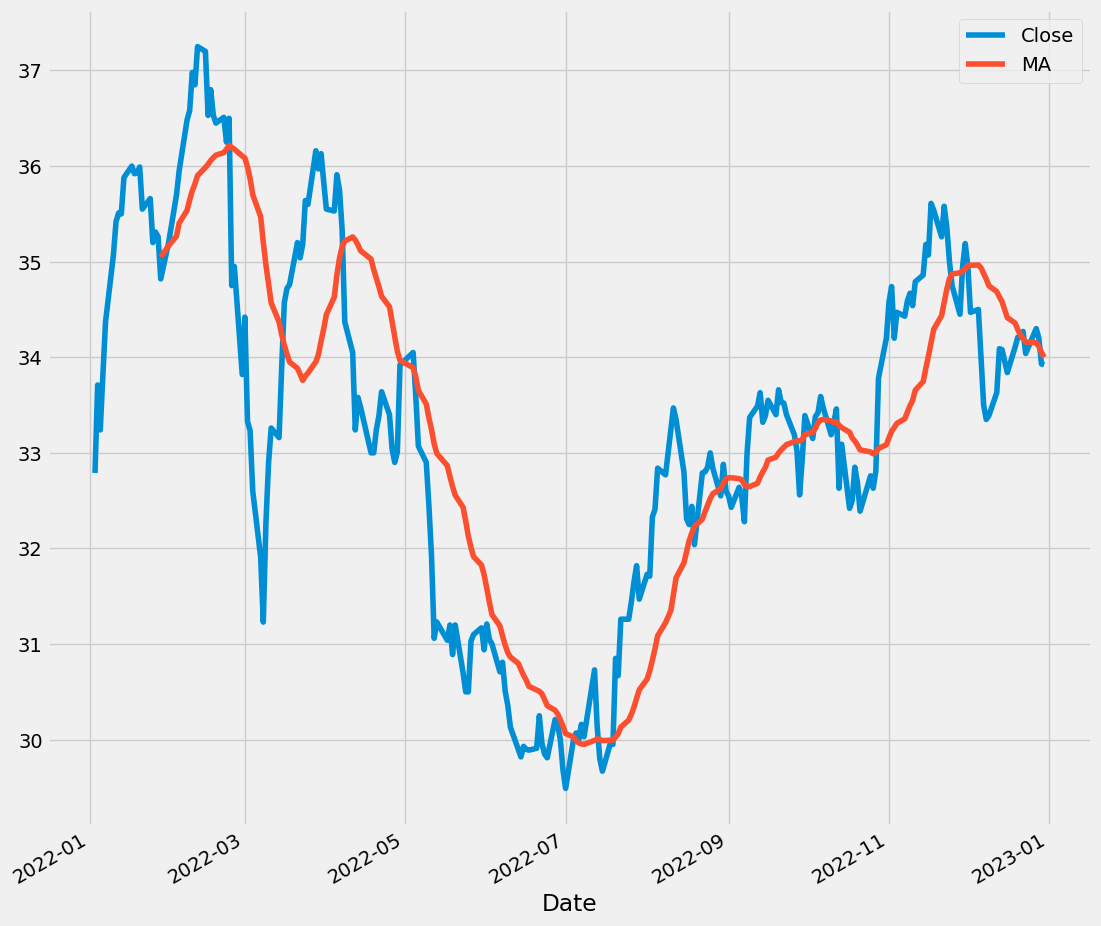

In [5]:
df['MA'] = ta.SMA(df['Close'],20)
df[['Close','MA']].plot(figsize=(12,12))
plt.show()

In [6]:
#u see now that the new MA column has been added
df

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600,NaN
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200,NaN
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600,NaN
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100,NaN
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600,NaN
...,...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300,34.1595
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900,34.1520
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100,34.1145




---



#4. Exponential Moving Average (EMA)

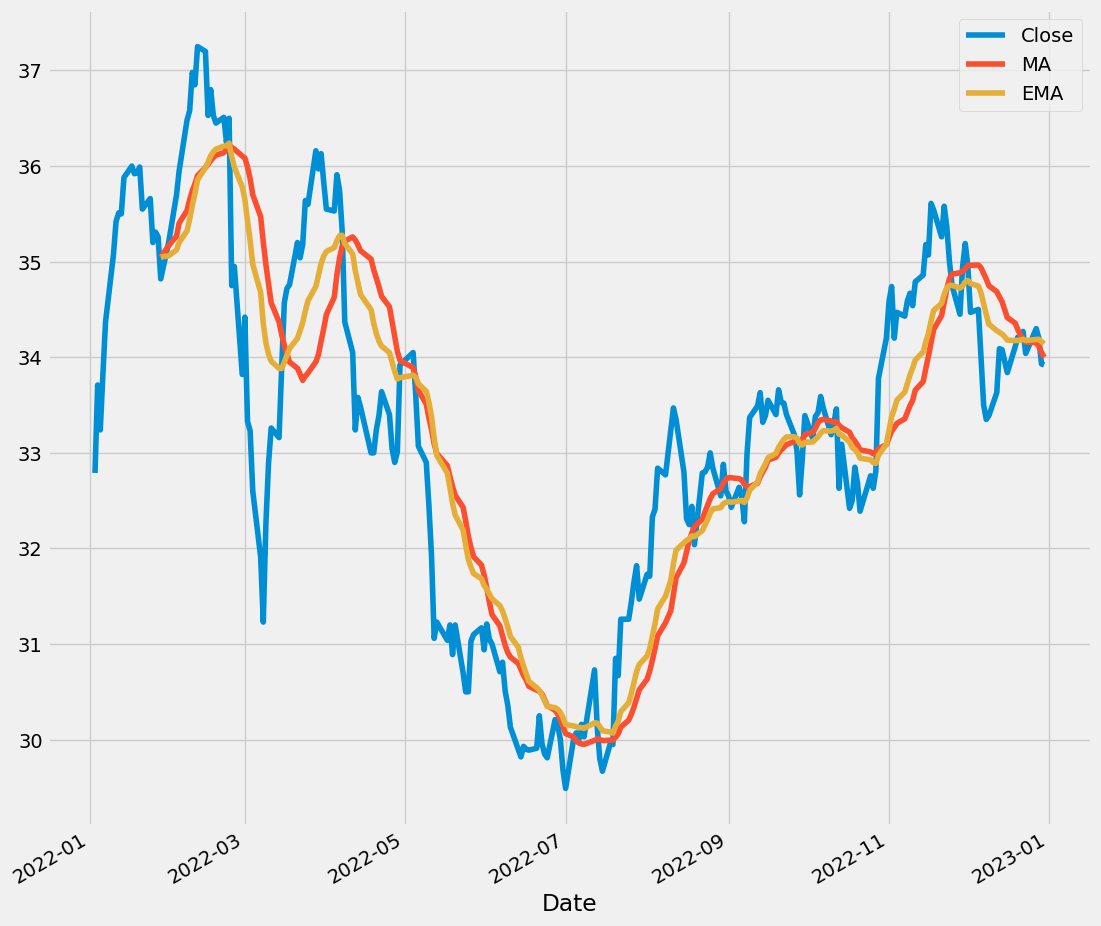

In [7]:
df['MA'] = ta.SMA(df['Close'],timeperiod=20)
df['EMA'] = ta.EMA(df['Close'], timeperiod = 20)
df[['Close','MA','EMA']].plot(figsize=(12,12))
plt.show()

In [8]:
#u see now that the new EMA column has been added
df

,Open,High,Low,Close,Adj Close,Volume,MA,EMA
Date,,,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600,NaN,NaN
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200,NaN,NaN
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600,NaN,NaN
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100,NaN,NaN
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300,34.1595,34.174597
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900,34.1520,34.186540
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100,34.1145,34.187822




---



#5. Relative Strength Index (RSI)

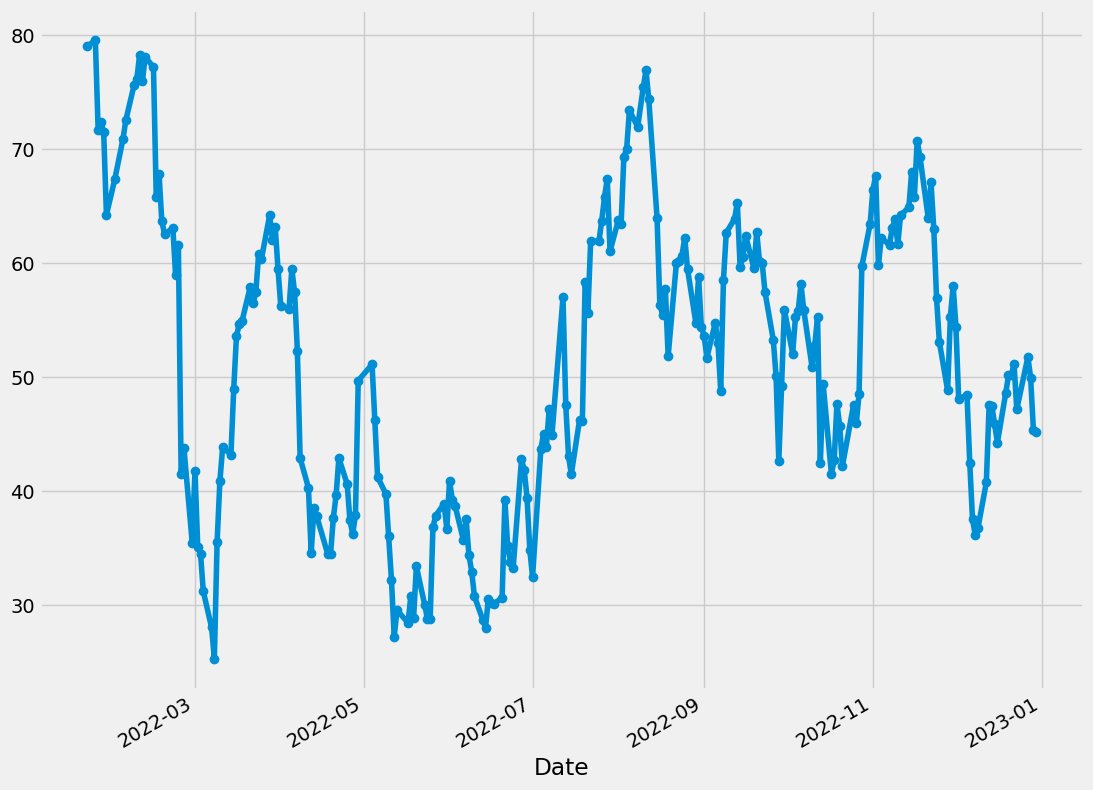

In [9]:
df['RSI'] = ta.RSI(df['Close'],14)
df['RSI'].plot(figsize=(12,10),marker='o')
plt.show()

In [10]:
#u see now the new RSI column has been added
df

,Open,High,Low,Close,Adj Close,Volume,MA,EMA,RSI
Date,,,,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600,NaN,NaN,NaN
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200,NaN,NaN,NaN
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600,NaN,NaN,NaN
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100,NaN,NaN,NaN
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300,34.1595,34.174597,47.162229
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900,34.1520,34.186540,51.743046
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100,34.1145,34.187822,49.949402




---



#6. Bollinger Bands (BB)

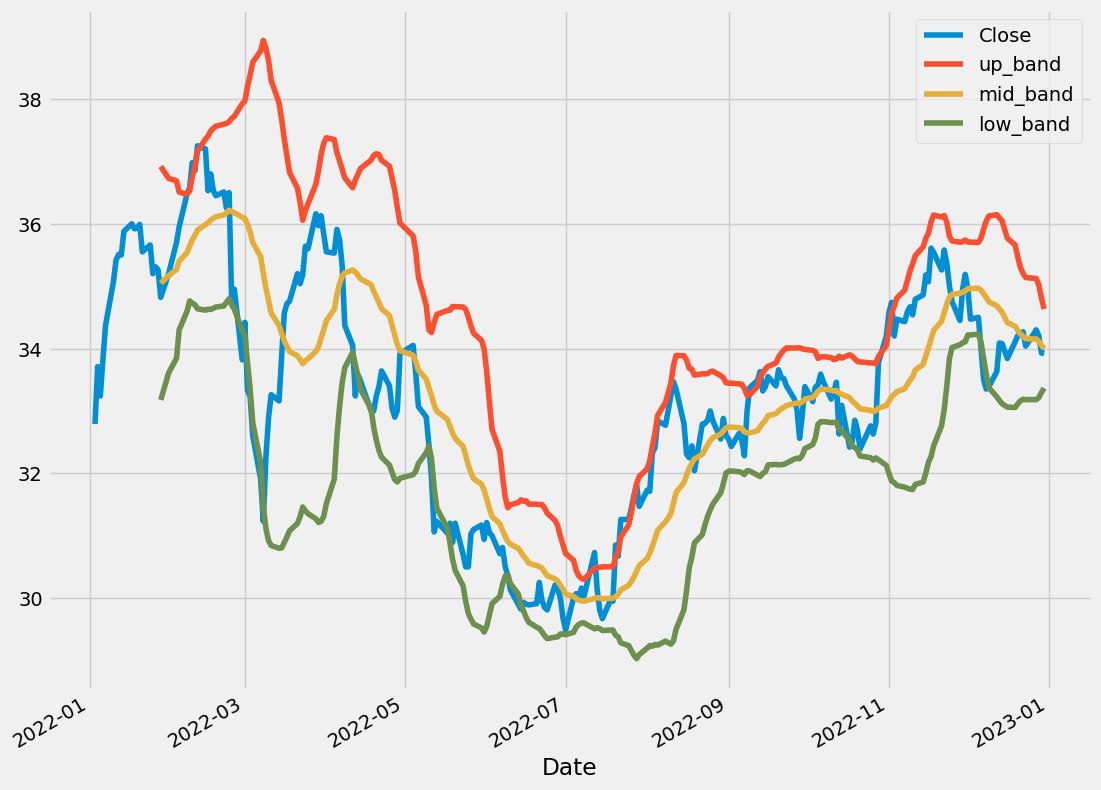

In [11]:
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)

df[['Close','up_band','mid_band','low_band']].plot(figsize=(12,10))
plt.show()

In [12]:
#u see that the BBs have been created: Up Band / Mid Band / Low Bands
df

,Open,High,Low,Close,Adj Close,Volume,MA,EMA,RSI,up_band,mid_band,low_band
Date,,,,,,,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300,34.1595,34.174597,47.162229,35.137631,34.1595,33.181369
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900,34.1520,34.186540,51.743046,35.123383,34.1520,33.180617
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100,34.1145,34.187822,49.949402,35.015088,34.1145,33.213912




---



#7. ADX - Average Directional Movement Index

In [14]:
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Open'].values, timeperiod=14)

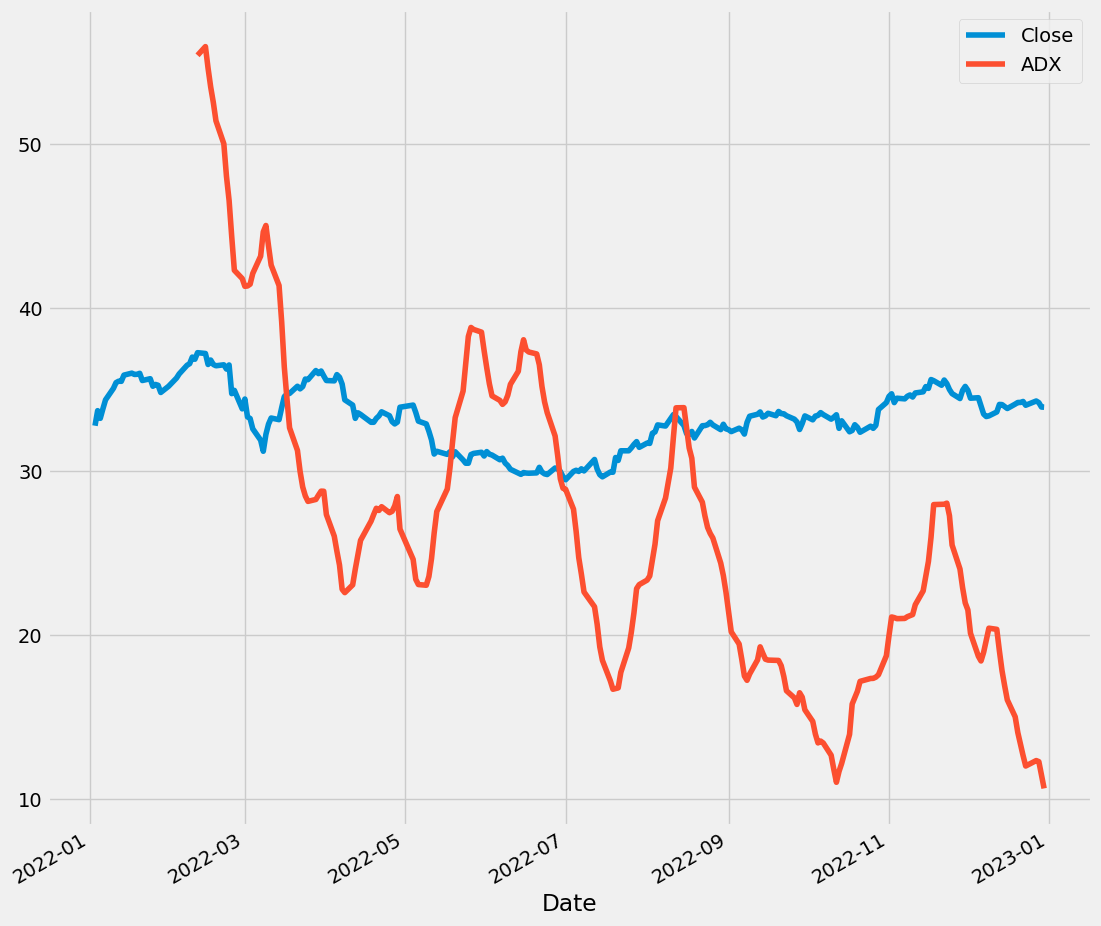

In [17]:
df[['Close', 'ADX']].plot(figsize=(12,12))
plt.show()

#note that increasing ADX values do not necessarily mean there is an uptrend.
#You need to look at the ADX value in relation to other indicators
#to determine whether the trend is bullish or bearish.

In [15]:
#u see that ADX has been created
df

,Open,High,Low,Close,Adj Close,Volume,MA,EMA,RSI,up_band,mid_band,low_band,ADX
Date,,,,,,,,,,,,,
2022-01-03,32.799999,32.830002,32.720001,32.790001,30.541000,1610600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,33.049999,33.779999,33.009998,33.709999,31.397892,5285200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,33.799999,33.849998,33.070000,33.240002,30.960135,4654600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,32.980000,33.820000,32.959999,33.820000,31.500353,4700100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,34.150002,34.369999,34.040001,34.369999,32.012627,5028600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,34.000000,34.230000,33.980000,34.040001,33.089344,1341300,34.1595,34.174597,47.162229,35.137631,34.1595,33.181369,12.013768
2022-12-27,34.570000,34.570000,34.130001,34.299999,33.342083,1666900,34.1520,34.186540,51.743046,35.123383,34.1520,33.180617,12.346201
2022-12-28,34.020000,34.349998,34.020000,34.200001,33.244873,1563100,34.1145,34.187822,49.949402,35.015088,34.1145,33.213912,12.281109




---

#THE END



---

